# Pull out basic statistics about void life
Use our matched voids to show a few things about how voids move and change

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

Configuration

In [2]:
run_path = Path('../../runs/drift-corrected-625C/')
pixel_size = 0.47  # nm/pixel

## Load in the Void Data
Load in the void tracks from a previous notebook and the overall summaries in each

In [3]:
void_tracks = pd.read_json(run_path / 'void_tracks.json')
void_tracks.head(2)

,start_frame,end_frame,total_frames,inferred_frames,positions,local_id,disp_from_start,max_disp,drift_rate,dist_traveled,total_traveled,movement_rate,radii,max_radius,min_radius,growth_rate
0,0,25,26,23,"[[3.7627118644, 745.3389830508], [3.8007532957...","[0, None, None, None, None, None, None, None, ...","[0.0, 0.0476965592, 0.0953931185, 0.1430896777...",2.695101,0.103658,"[0.0, 0.0476965592, 0.0953931185, 0.1430896777...",3.790152,0.145775,"[4.3336224207, 4.3211095789, 4.3085967371, 4.2...",4.333622,4.145930,-0.012513
1,0,338,339,123,"[[493.6526946108, 266.8922155689], [492.622950...","[34, 38, 41, 34, 34, 37, 32, None, None, None,...","[0.0, 1.2335113262, 2.0486717212, 2.3058971942...",17.745102,0.052345,"[0.0, 1.2335113262, 2.2319189786, 3.089721106,...",465.101293,1.371980,"[7.290936222, 6.2316776324, 6.6755811781, 5.64...",7.290936,3.989423,0.000141


In [4]:
frame_data = pd.read_json(run_path / 'frame_data.json')
frame_data.head(2)

,void_frac,void_count,radii,radii_average,positions,run_time,created_time,completed_time,mask-path,image-path,rtt,detect_time,frame
0,0.027991,63,"[4.3336224207, 10.5550206141, 21.6019048499, 4...",10.117077,"[[3.7627118644, 745.3389830508], [7.5828571429...",0.316171,2023-04-20 12:50:41.216,2023-04-26 18:45:39.257,frames/masks/frame-0000.tiff,frames/frame-0000.tiff,12.662785,2023-04-26 18:45:26.594,0
1,0.029202,76,"[10.7935822757, 21.468877828, 4.7539459314, 7....",9.324464,"[[7.8169398907000005, 870.9972677596], [30.921...",0.313740,2023-04-20 12:50:41.216,2023-04-26 18:47:09.517,frames/masks/frame-0001.tiff,frames/frame-0001.tiff,102.920291,2023-04-26 18:45:26.596,1


## Look at Coarse Metrics
Are large voids growing or shrinking

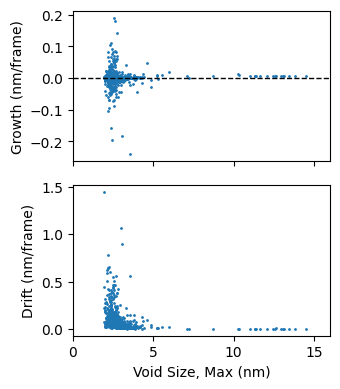

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(3.5, 4.), sharex=True)

# Plot the void growth
ax = axs[0]
ax.scatter(void_tracks['max_radius'] * pixel_size, void_tracks['growth_rate'] * pixel_size, s=1)
ax.set_xlim(0, 16)
ax.plot(ax.get_xlim(), [0, 0], 'k--', lw=1)
ax.set_ylabel('Growth (nm/frame)')

# Plot the movement
ax = axs[1]
ax.scatter(void_tracks['max_radius'] * pixel_size, void_tracks['drift_rate'] * pixel_size, s=1)
ax.set_ylabel('Drift (nm/frame)')

ax.set_xlabel('Void Size, Max (nm)')
fig.tight_layout()

fig.savefig('figures/coarse-metrics.png', dpi=320)

Large voids continue to continue to grow, small ones will disappear. Drift (how much it moved from the start) is only noticable for the small voids

## Change in Distribution over Time
We start with a bimodal distribution and it becomes clearer over time

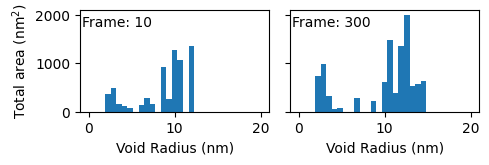

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(5., 1.75), sharey=True, sharex=True)

bins = np.linspace(0, 20, 32)
for fid, ax in zip([10, 300], axs):
    radii = np.multiply(frame_data.loc[fid]['radii'], pixel_size)
    area = np.pi * radii ** 2
    ax.hist(radii, bins=bins, weights=area)
    ax.set_xlabel('Void Radius (nm)')
    ax.text(0.01, 0.95, f'Frame: {fid}', transform=ax.transAxes, ha='left', va='top')
axs[0].set_ylabel('Total area (nm$^2$)')

fig.tight_layout()
fig.savefig('figures/radius-histogram.png', dpi=320)